In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def sigmoid(x):
    return 1/(1+math.exp(-x))

In [4]:
def sigmoid_diff(x):
    return sigmoid(x)*(1-sigmoid(x))

In [11]:
def dw(c,x,y,w,b):
    y_in = np.dot(x,w)+b
    y_hat = sigmoid(y_in)
    return c*(y-y_hat)*sigmoid_diff(y_in)

In [6]:
def Loss(x,y,w,b):
    y_in = np.dot(x,w)+b
    y_hat = sigmoid(y_in)
    return (y - y_hat)**2

In [13]:
def gradient_descent(X,Y,w,b,c,epoch):
    loss = []
    W = []
    B = []
    for i in range(epoch):
        l = 0
        for x,y in zip(X,Y):
            w_new = w + dw(c,x,y,w,b)*x
            b_new = b + dw(c,x,y,w,b)
            l += Loss(x,y,w,b)
            w = w_new
            b = b_new
        loss.append(l/len(Y))
        W.append(w)
        B.append(b)
        print(f"Epoch = {i}, w = {w}, b = {b}")
    return W,B,loss

In [23]:
def batch_descent(X,Y,w,b,c,epoch):
    loss = []
    W = []
    B = []
    for i in range(epoch):
        cw,cb,l = 0,0,0
        for x,y in zip(X,Y):
            cw += dw(c,x,y,w,b)*x
            cb += dw(c,x,y,w,b)
            l += Loss(x,y,w,b)
        loss.append(l/len(Y))
        w += cw/len(Y)
        b += cb/len(Y)
        W.append(w)
        B.append(b)
        print(f"Epoch = {i}, w = {w}, b = {b}")
    return W,B,loss

In [37]:
def dw(x,y,w,b):
    y_in = np.dot(x,w)+b
    y_hat = sigmoid(y_in)
    return -2*(y-y_hat)*sigmoid_diff(y_in)

In [36]:
def minibatch(X,Y,w,b,c,epoch,batch_size):
    loss = []
    W = []
    B = []
    for i in range(epoch):
        DW,DB,sample,l = 0,0,0,0
        for x,y in zip(X,Y):
            DW += dw(x,y,w,b)*x
            DB += dw(x,y,w,b)
            l += Loss(x,y,w,b)
            sample += 1
            if sample%batch_size == 0:
                w += DW/batch_size
                b += DB/batch_size
        loss.append(l/batch_size)
        W.append(w)
        B.append(B)
    return W,B,loss

In [48]:
def NAG(X,Y,w,b,epoch,beta,eta):
    loss = []
    W = []
    B = []
    l = 0
    for i in range(epoch):
        DW,DB,vw,vb = 0,0,0,0
        vw *= beta
        vb *= beta
        wt = w+vw
        bt = b+vb
        dwt,dbt = 0,0
        for x,y in zip(X,Y):
            dwt += dw(x,y,w,b)*x
            dbt += dw(x,y,w,b)
            l += Loss(x,y,w,b)
        w = wt + (-eta)*(1-beta)*dwt/len(X)
        b = bt + (-eta)*(1-beta)*dbt/len(X)
        loss.append(l/len(Y))
        W.append(w)
        B.append(B)
    return W,B,loss

In [58]:
def mommentum(X,Y,w,b,epoch,beta,eta):
    loss = []
    W = []
    B = []
    l = 0
    for i in range(epoch):
        Dw,Db = 0,0
        vw,vb = 0,0
        for x,y in zip(X,Y):
            Dw += dw(x,y,w,b)*x
            Db += dw(x,y,w,b)
            l += Loss(x,y,w,b)
        vw = beta*vw + (1-beta)*Dw
        vb = beta*vb + (1-beta)*Db
        w = w + (-eta)*vw
        b = b + (-eta)*vb
        loss.append(l/len(Y))
        W.append(w)
        B.append(B)
    return W,B,loss

In [61]:
def adagrad(X,Y,w,b,epoch,beta,eta,eps):
    loss = []
    W = []
    B = []
    l = 0
    for i in range(epoch):
        Dw,Db = 0,0
        for x,y in zip(X,Y):
            Dw += dw(x,y,w,b)*x
            Db += dw(x,y,w,b)
            l += Loss(x,y,w,b) 
        w += (eta/np.sqrt(Dw**2+eps))*Dw
        b += (eta/np.sqrt(Db**2+eps))*Db
        loss.append(l/len(Y))
        W.append(w)
        B.append(B)
    return W,B,loss

In [65]:
def adadelta(X,Y,w,b,epoch,beta,eta,eps):
    loss = []
    W = []
    B = []
    l = 0
    for i in range(epoch):
        Dw,Db = 0,0
        vw,vb = 0,0
        for x,y in zip(X,Y):
            Dw += dw(x,y,w,b)*x
            Db += dw(x,y,w,b)
            l += Loss(x,y,w,b)
        vw = beta*vw + (1-beta)*Dw
        vb = beta*vb + (1-beta)*Db
        w += (eta/(np.sqrt(vw+eps)))*Dw**2
        b += (eta/(np.sqrt(vb+eps)))*Db**2
        loss.append(l/len(Y))
        W.append(w)
        B.append(B)
    return W , B, loss

In [70]:
def adam(X,Y,w,b,epoch,eta,beta1,beta2,eps):
    loss = []
    W = []
    B = []
    l = 0
    for i in range(epoch):
        Dw,Db = 0,0
        vw,vb = 0,0
        vww,vbb = 0,0
        for x,y in zip(X,Y):
            Dw += dw(x,y,w,b)*x
            Db += dw(x,y,w,b)
            l += Loss(x,y,w,b)
        vw = vw*beta1 + (1-beta1)*vw
        vb = vb*beta1+ (1-beta1)*vb
        vww = vww*beta2 + (1-beta2)*Dw**2
        vbb = vbb*beta2 + (1-beta2)*Db**2
        vwwh = vww/(1-beta2)**i
        vbbh = vbb/(1-beta2)**i
        vbh = vb/(1-beta1)**i
        vwh = vw/(1-beta1)**i
        w += ((eta*vwh)/(np.sqrt(vwwh+eps)))*Dw
        b += ((eta*vbh)/(np.sqrt(vbbh+eps)))*Db
        loss.append(l/len(Y))
        W.append(w)
        B.append(B)
    return W,B,loss

In [19]:
X = [0.5,2.5]
Y = [0.2,0.0]

In [20]:
W , B , loss = gradient_descent(X,Y,-2,-2,1,300)

Epoch = 0, w = -1.9965557436598425, b = -1.9931080659349785
Epoch = 1, w = -1.9930934837574381, b = -1.9861800165831218
Epoch = 2, w = -1.9896131501508625, b = -1.9792157076513235
Epoch = 3, w = -1.9861146755047951, b = -1.9722150002931205
Epoch = 4, w = -1.982597995453751, b = -1.9651777614276773
Epoch = 5, w = -1.9790630487715244, b = -1.9581038640708481
Epoch = 6, w = -1.9755097775470178, b = -1.9509931876786353
Epoch = 7, w = -1.9719381273666148, b = -1.94384561850336
Epoch = 8, w = -1.968348047503269, b = -1.9366610499628603
Epoch = 9, w = -1.9647394911124723, b = -1.9294393830230276
Epoch = 10, w = -1.9611124154352624, b = -1.9221805265939875
Epoch = 11, w = -1.957466782008434, b = -1.914884397940225
Epoch = 12, w = -1.9538025568821076, b = -1.907550923104947
Epoch = 13, w = -1.950119710844809, b = -1.9001800373489668
Epoch = 14, w = -1.9464182196562074, b = -1.8927716856043826
Epoch = 15, w = -1.942698064287654, b = -1.8853258229433096
Epoch = 16, w = -1.9389592311706554, b = -1

In [21]:
loss

[0.011639860156985048,
 0.011580343083684582,
 0.011520201118493537,
 0.01145942852048942,
 0.011398019607505066,
 0.011335968763707235,
 0.011273270447558503,
 0.01120991920017572,
 0.011145909654098087,
 0.011081236542478206,
 0.011015894708709293,
 0.010949879116501773,
 0.010883184860422258,
 0.01081580717690795,
 0.01074774145576901,
 0.010678983252191342,
 0.01060952829925178,
 0.010539372520957171,
 0.01046851204581831,
 0.010396943220969034,
 0.010324662626839997,
 0.010251667092395736,
 0.01017795371094264,
 0.01010351985651424,
 0.010028363200839097,
 0.009952481730894788,
 0.009875873767050219,
 0.009798537981796527,
 0.00972047341906472,
 0.009641679514126393,
 0.009562156114071064,
 0.009481903498851313,
 0.00940092240288412,
 0.009319214037193421,
 0.009236780112076083,
 0.009153622860269411,
 0.009069745060594941,
 0.008985150062048823,
 0.008899841808305062,
 0.008813824862592945,
 0.008727104432905359,
 0.00863968639748933,
 0.008551577330564754,
 0.008462784528211535,

In [16]:
epoch = [i for i in range(1,301)]

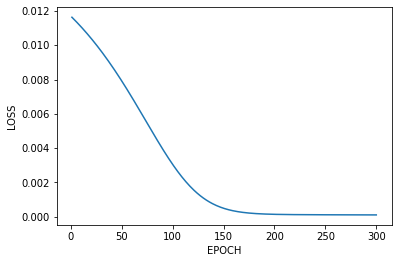

In [22]:
plt.plot(epoch,loss)
plt.xlabel("EPOCH")
plt.ylabel("LOSS")
plt.show()

In [24]:
W , B , loss = batch_descent(X,Y,-2,-2,1,300)

Epoch = 0, w = -1.998277839219817, b = -1.9965540199234475
Epoch = 1, w = -1.9965511755087872, b = -1.9930990081091058
Epoch = 2, w = -1.9948199998973397, b = -1.9896349461450775
Epoch = 3, w = -1.9930843035845134, b = -1.9861618159470087
Epoch = 4, w = -1.9913440779428921, b = -1.982679599767746
Epoch = 5, w = -1.9895993145236355, b = -1.9791882802071774
Epoch = 6, w = -1.9878500050616041, b = -1.9756878402222597
Epoch = 7, w = -1.986096141480582, b = -1.9721782631372344
Epoch = 8, w = -1.9843377158985978, b = -1.968659532654034
Epoch = 9, w = -1.9825747206333446, b = -1.965131632862883
Epoch = 10, w = -1.9808071482077017, b = -1.9615945482530939
Epoch = 11, w = -1.9790349913553567, b = -1.9580482637240624
Epoch = 12, w = -1.9772582430265329, b = -1.9544927645964634
Epoch = 13, w = -1.9754768963938205, b = -1.95092803662365
Epoch = 14, w = -1.9736909448581135, b = -1.9473540660032596
Epoch = 15, w = -1.9719003820546541, b = -1.943770839389026
Epoch = 16, w = -1.9701052018591867, b = -

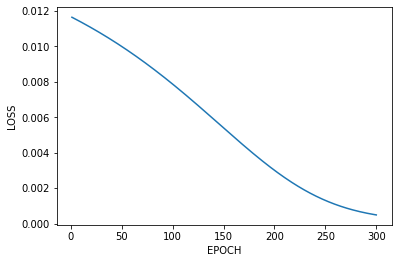

In [25]:
plt.plot(epoch,loss)
plt.xlabel("EPOCH")
plt.ylabel("LOSS")
plt.show()

In [34]:
W , B , loss = minibatch(X,Y,-2,-2,1,300,2)

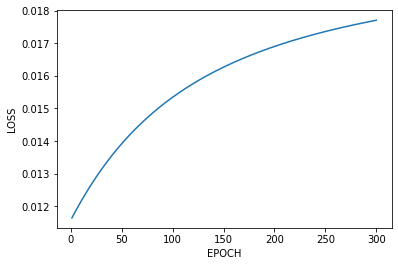

In [35]:
plt.plot(epoch,loss)
plt.xlabel("EPOCH")
plt.ylabel("LOSS")
plt.show()

In [49]:
W , B, loss = NAG(X,Y,-2,-2,300,1,0.9)

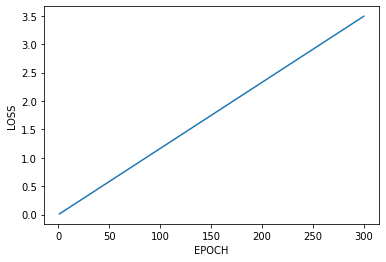

In [50]:
plt.plot(epoch,loss)
plt.xlabel("EPOCH")
plt.ylabel("LOSS")
plt.show()

In [59]:
W , B ,loss = mommentum(X,Y,-2,-2,300,1,0.9)

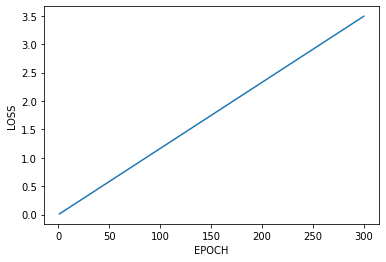

In [60]:
plt.plot(epoch,loss)
plt.xlabel("EPOCH")
plt.ylabel("LOSS")
plt.show()

In [63]:
W , B ,loss = adagrad(X,Y,-2,-2,300,1,0.9,2)

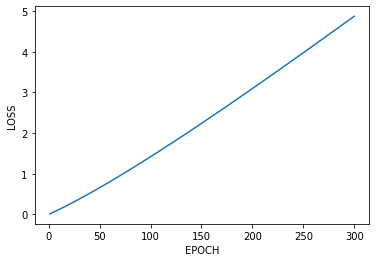

In [64]:
plt.plot(epoch,loss)
plt.xlabel("EPOCH")
plt.ylabel("LOSS")
plt.show()

In [66]:
W , B ,loss = adadelta(X,Y,-2,-2,300,1,0.9,2)

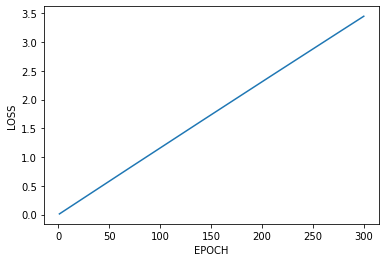

In [67]:
plt.plot(epoch,loss)
plt.xlabel("EPOCH")
plt.ylabel("LOSS")
plt.show()

In [71]:
W ,B, loss = adam(X,Y,-2,-2,300,1,0.5,0.7,2)

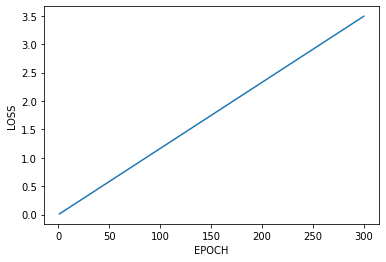

In [72]:
plt.plot(epoch,loss)
plt.xlabel("EPOCH")
plt.ylabel("LOSS")
plt.show()